# Music Genre classification 
### Team: Mengyao Song & Steven Wang

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import keras
from keras import models
from keras import layers
import tensorflow as tf
import imageio
import warnings
warnings.filterwarnings('ignore')

## <div class="alert alert-block alert-info"> Part 1 - Loading Data </div>

In [2]:
#librosa : It is a Python module to analyze audio signals in general but geared more towards music. 
#IPython.display : lets you play audio directly in your notebook.
import librosa
import librosa.display
import IPython.display as ipd

In [3]:
#View all the files have been downloaded correctly and can be viewed
#general_path = r'(your file location)'
general_path = r'C:\Users\Steve\Documents\Santa Clara University Classes\Fall 2021\Deep Learning\Final Project'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


## Reading audio files in Notebook. Below is an example

In [4]:
#Note I am viewing One sample - in folder Rock 00030
#You can change to view another. Example - /classical/classical.00015.wav
audio_sample1 = 'C:/Users/Steve/Documents/Santa Clara University Classes/Fall 2021/Deep Learning/Final Project/genres_original/rock/rock.00020.wav'

In [5]:
#Set up Data
sample_data, sr = librosa.load(audio_sample1 , sr = 22050)
print(type(sample_data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


## <div class="alert alert-block alert-info"> Part 2 - Visualization </div>

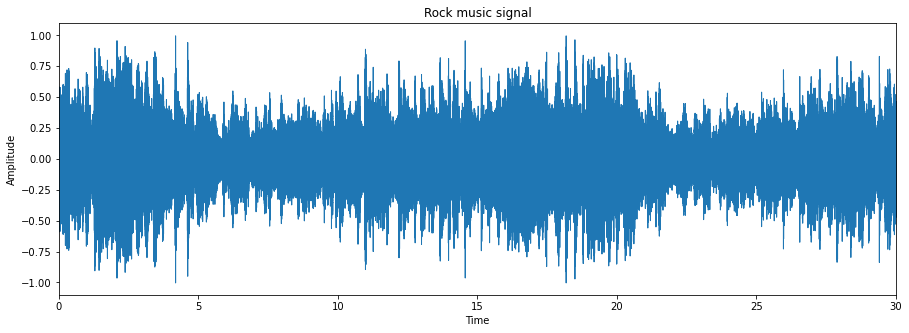

In [6]:
#Plot the sample point to view sound waves of a song sample
plt.figure(figsize=(15,5))
librosa.display.waveplot(sample_data , sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Rock music signal")
plt.show()

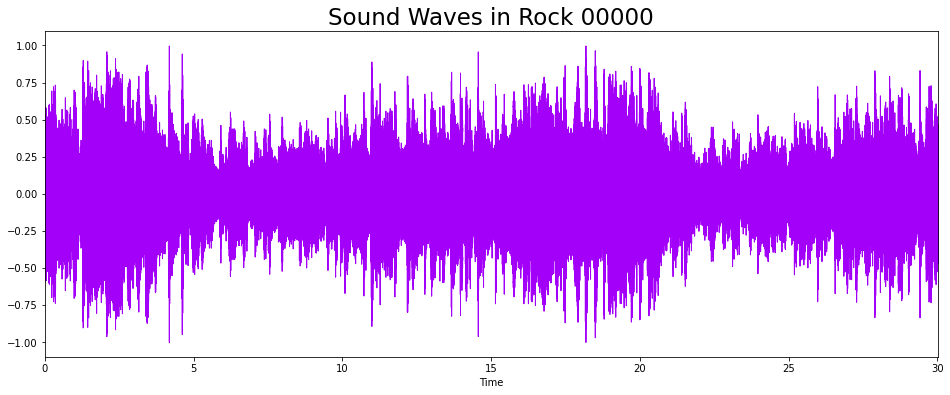

In [7]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = sample_data, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Rock 00000", fontsize = 23);

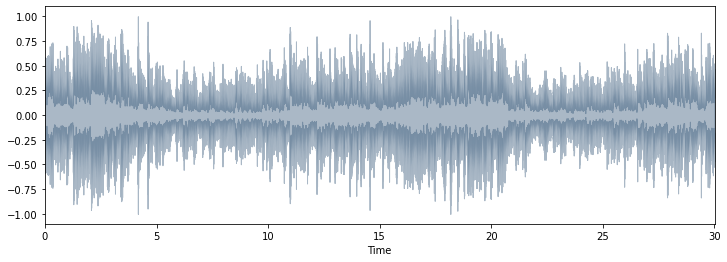

In [8]:
#Spectral rolloff of sample song
spectral_rolloff = librosa.feature.spectral_rolloff(sample_data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(sample_data, sr=sr, alpha=0.4, color = "#2B4F72")

## Playback of the sample

In [9]:
ipd.Audio(sample_data, rate=sr)

### Spectrogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

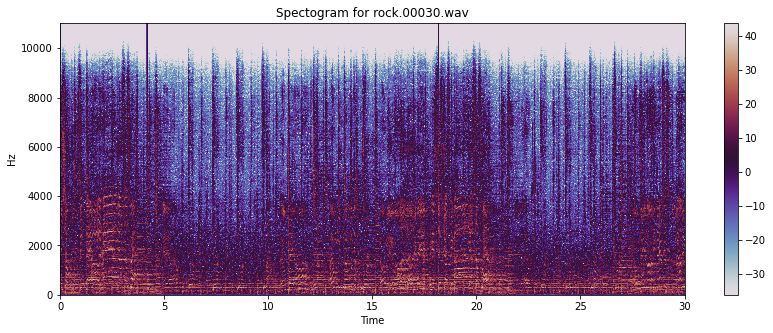

In [10]:
Xspec = librosa.stft(sample_data)
Xdb = librosa.amplitude_to_db(abs(Xspec))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='twilight')
plt.title("Spectogram for rock.00030.wav")
plt.colorbar()

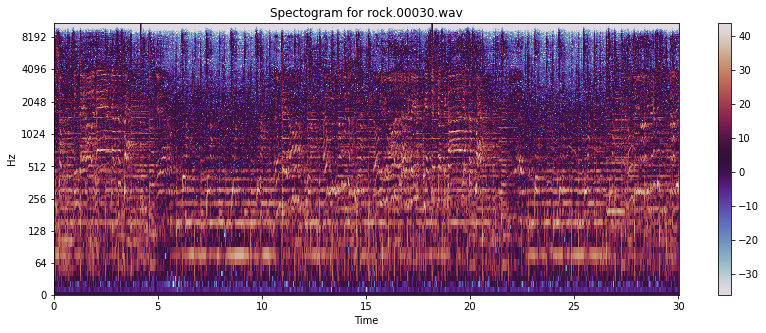

In [11]:
#Normalize Spectrogram
Xnormspec = librosa.stft(sample_data)
Xdb = librosa.amplitude_to_db(abs(Xnormspec))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', cmap='twilight')
plt.title("Spectogram for rock.00030.wav")
plt.colorbar()

### Feature extraction from Audio signal

#### 1. Spectral Centroid

In [12]:
#Note I am viewing One sample - in folder Rock 00030
#You can change to view another. Example - /classical/classical.00015.wav
audio_sample1 = 'C:/Users/Steve/Documents/Santa Clara University Classes/Fall 2021/Deep Learning/Final Project/genres_original/classical/classical.00015.wav'
audio_sample2 = 'C:/Users/Steve/Documents/Santa Clara University Classes/Fall 2021/Deep Learning/Final Project/genres_original/blues/blues.00098.wav'

In [13]:
#Set up Data
sample_data, sr = librosa.load(audio_sample1 , sr = 22050)
sample_data2, sr = librosa.load(audio_sample2 , sr = 22050)
print(type(sample_data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


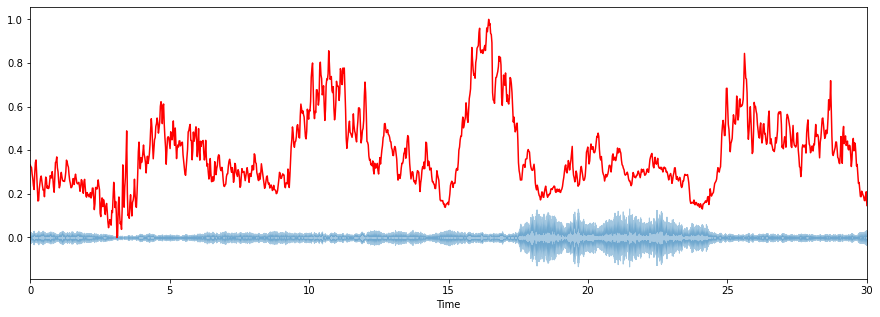

In [14]:
#Spectral Centroid where the ” center of mass” for a sound is located.
spectral_centroids = librosa.feature.spectral_centroid(sample_data, sr=sr)[0]
#.spectral_centroid will return an array with columns equal to the number of frames present in your sample.

# Computing the time variable for visualization
plt.figure(figsize=(15, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(sample_data, axis=0):
    return sklearn.preprocessing.minmax_scale(sample_data, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(sample_data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

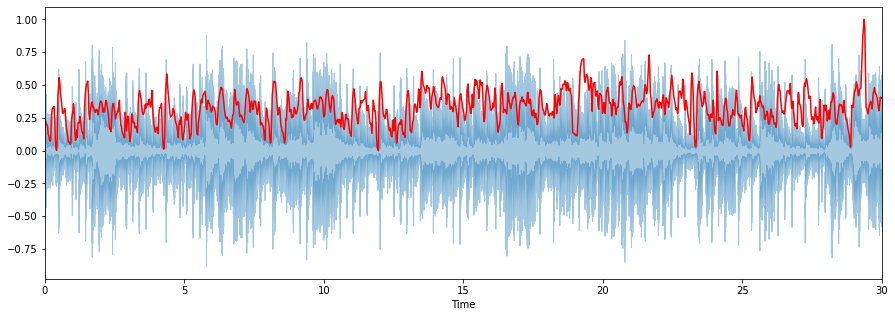

In [15]:
spectral_centroids = librosa.feature.spectral_centroid(sample_data2, sr=sr)[0]
#.spectral_centroid will return an array with columns equal to the number of frames present in your sample.

# Computing the time variable for visualization
plt.figure(figsize=(15, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(sample_data2, axis=0):
    return sklearn.preprocessing.minmax_scale(sample_data2, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(sample_data2, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#### 2. Spectral Rolloff

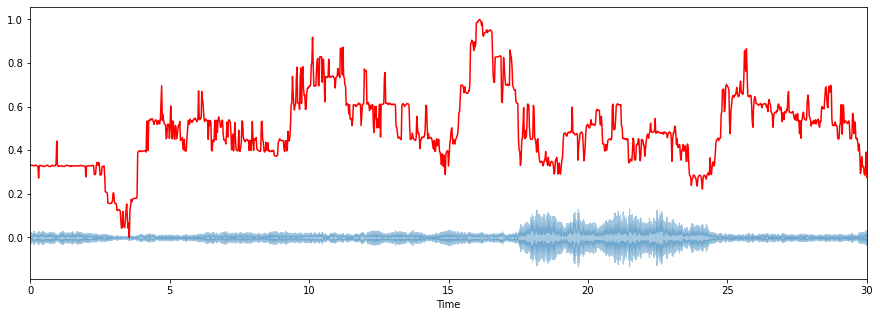

In [16]:
#A measure of the shape of the signal
#Represents the frequency at which high frequencies decline to 0

spectral_rolloff = librosa.feature.spectral_rolloff(sample_data+0.01, sr=sr)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(sample_data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

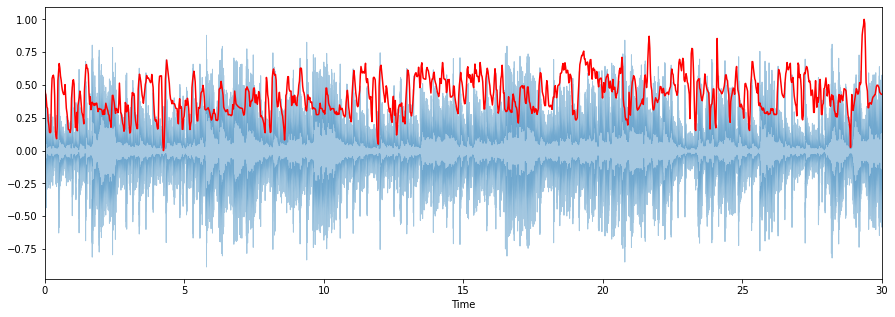

In [17]:
spectral_rolloff = librosa.feature.spectral_rolloff(sample_data2+0.01, sr=sr)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(sample_data2, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

#### 3. Spectral Bandwidth

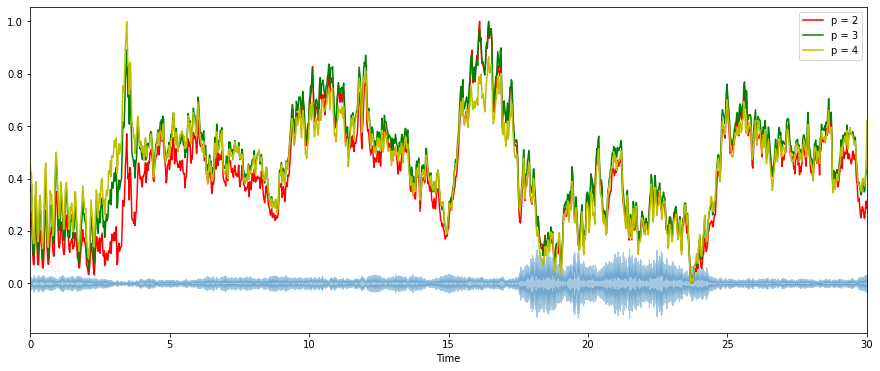

In [18]:

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(sample_data+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(sample_data+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(sample_data+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 6))
librosa.display.waveplot(sample_data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

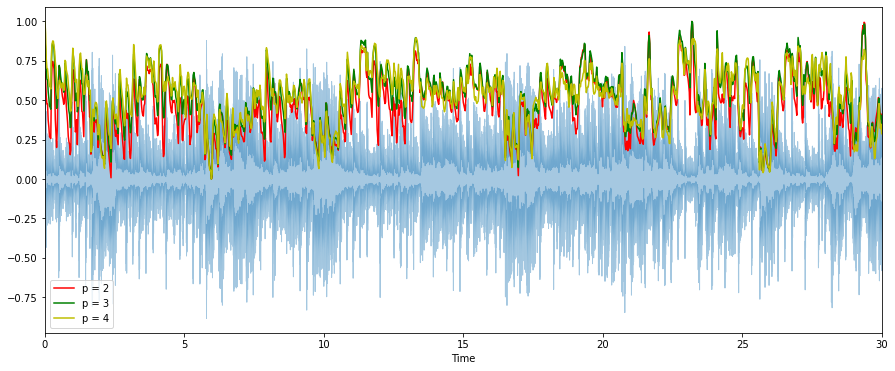

In [19]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(sample_data2+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(sample_data2+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(sample_data2+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 6))
librosa.display.waveplot(sample_data2, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#### 4. Zero-Crossing Rate

In [20]:
#measuring the smoothness of a signal

#higher values for highly percussive sounds like those in metal and rock.

n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(sample_data[n0:n1], pad=False)
print(sum(zero_crossings))

10


In [21]:
n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(sample_data2[n0:n1], pad=False)
print(sum(zero_crossings))

0


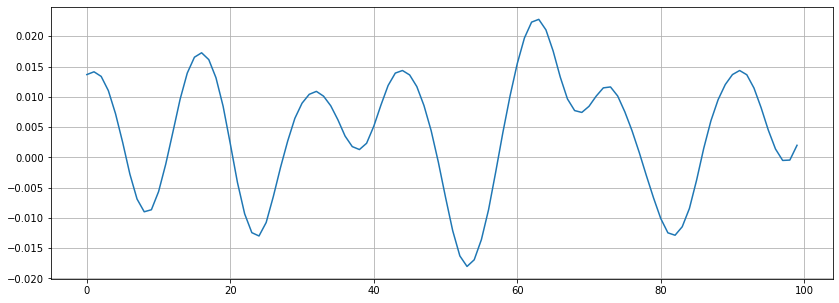

In [22]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(sample_data[n0:n1])
plt.grid()

#### 5. Mel-Frequency Cepstral Coefficients(MFCCs)

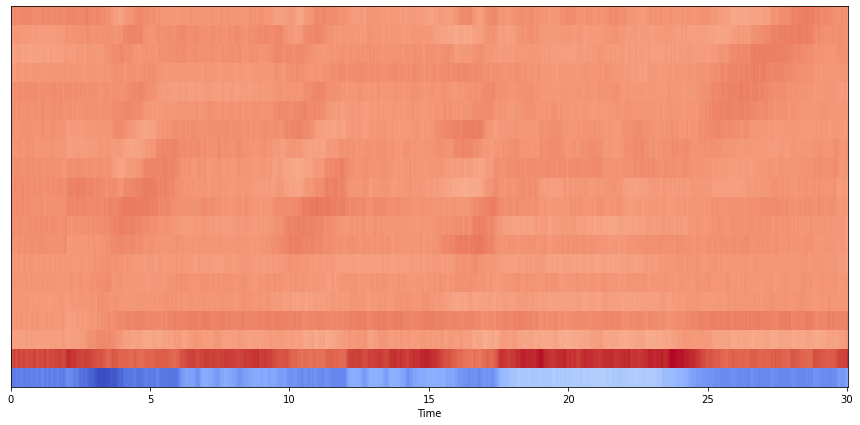

In [23]:
#Describe the overall shape of a spectral envelope

#models the characteristics of the human voice

mfccs = librosa.feature.mfcc(sample_data, sr=sr)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

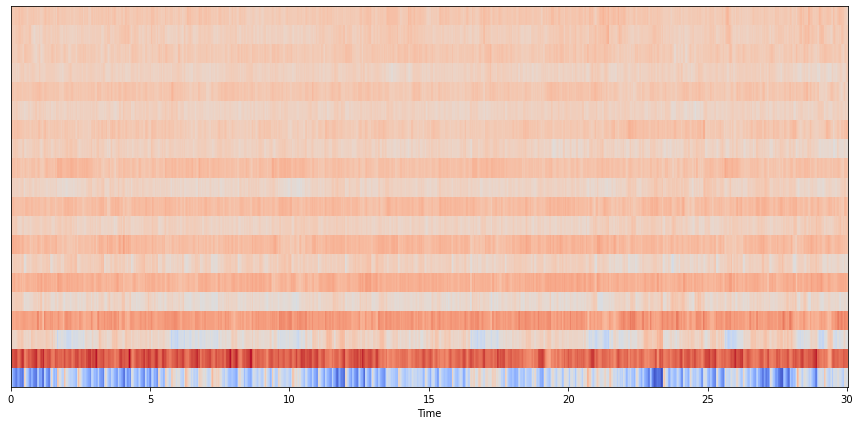

In [24]:
mfccs = librosa.feature.mfcc(sample_data2, sr=sr)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

#### 6. Chroma feature

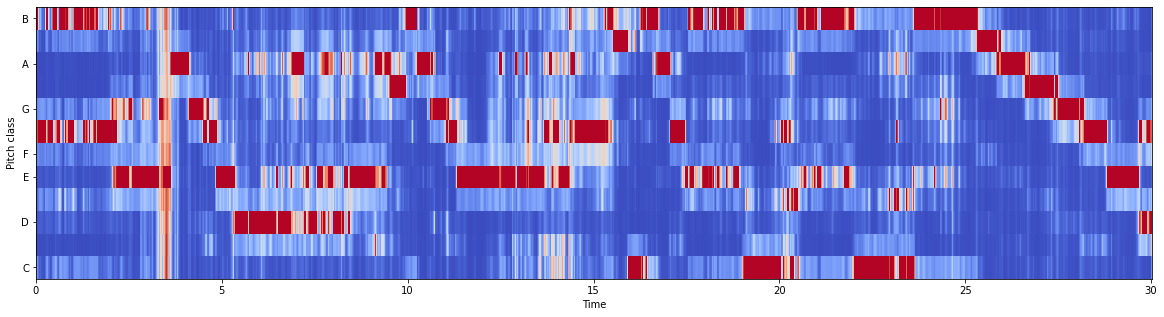

In [25]:
#a robust way to describe a similarity measure between music pieces.

hop_length = 512
chromagram = librosa.feature.chroma_stft(sample_data, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

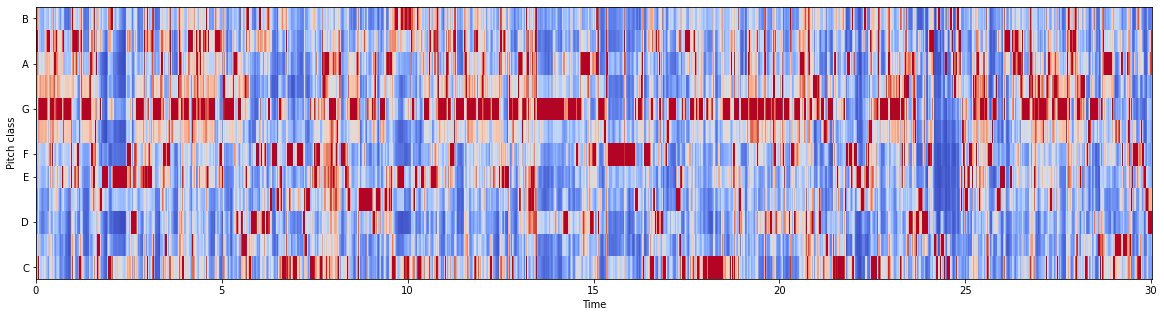

In [26]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(sample_data2, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## <div class="alert alert-block alert-info"> Part 3 - Data Preparation </div>

### Loading the excel file

In [27]:
df = pd.read_csv('features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032           167541.63090   
1  0.001450             1816.693777            90525.69087   
2  0.004620             1788.539719           111407.43760   
3  0.002448             1655.289045           111952.28450   
4  0.001701             1630.656199            79667.26765   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388            117335.77160  ...   39.687145   
1              2010.051501             65671.87567  ...   64.748276   
2              2084.565132             75124.92172  ...   67.336563   
3              1960.039988             82913.63927  ...   47.739452   
4              1948.503884             60204.02027  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [28]:
df30 = pd.read_csv('features_30_sec.csv')
df30.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [29]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [30]:
print("Dataset has",df.shape)
print("Count of Samples by Genre")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Samples by Genre


index  label
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

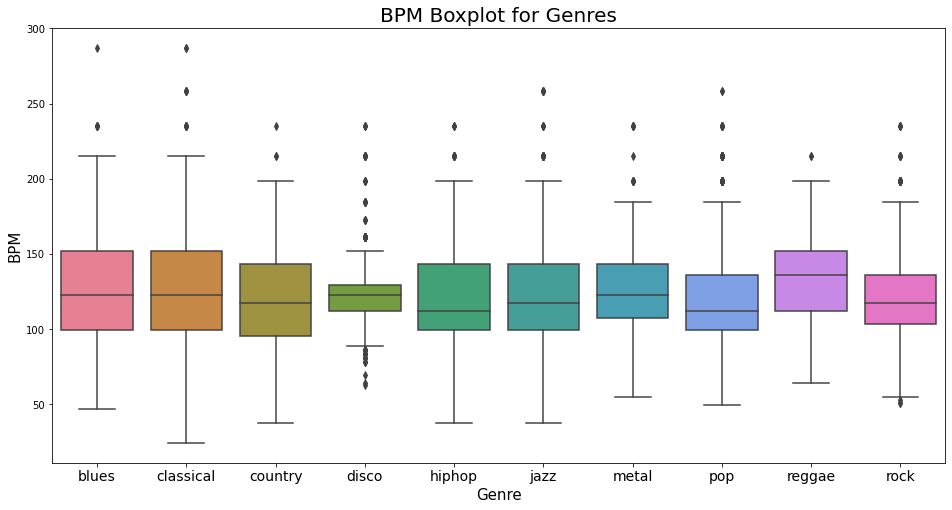

In [31]:
xboxplot = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = xboxplot, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

## <div class="alert alert-block alert-info"> Part 4 - Modeling </div>

## Neural Network

## Data Pre-Processing

In [32]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler

In [33]:
#Use LabelEncoder to label classes
label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [34]:
X = df.drop(['label','filename'],axis=1)
y = df['label'] 

In [35]:
X.shape

(9990, 58)

In [36]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
#Normalize data using minmaxscaler
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [69]:
#Split data into train and test. 80-20 train test split
input_train, input_test, target_train, target_test = train_test_split(X, y, test_size=0.2)
print(input_train.shape, target_train.shape)

(7992, 58) (7992,)


In [39]:
#Neural Network Model
model = Sequential()

model.add(Flatten(input_shape=(58,)))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 58)                0         
                                                                 
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [40]:
#Early stopping to avoid overfitting
#Checkpoint in case of error
early_stopping= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5) 
check_pointer = ModelCheckpoint(filepath = 'clf-resnet-checkpoint.hdf5',verbose=1,save_best_only=True) 
reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=5,min_delta = 0.0001,factor=0.2) 
callbacks = [check_pointer,early_stopping,reduce_lr]

In [41]:
#After experimenting, found Adam optimizer to be consistent and had higher scores
adam = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [42]:
history = model.fit(input_train, target_train,
                 validation_data = (input_test,target_test),
                 epochs = 100,
                 batch_size = 32, callbacks = [check_pointer,early_stopping])

Epoch 1/100
218/219 [============================>.] - ETA: 0s - loss: 4.0387 - accuracy: 0.1518
Epoch 00001: val_loss improved from inf to 3.65179, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 4.0377 - accuracy: 0.1522 - val_loss: 3.6518 - val_accuracy: 0.3143
Epoch 2/100
215/219 [============================>.] - ETA: 0s - loss: 3.3698 - accuracy: 0.2190
Epoch 00002: val_loss improved from 3.65179 to 3.04251, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 3.3654 - accuracy: 0.2191 - val_loss: 3.0425 - val_accuracy: 0.2953
Epoch 3/100
210/219 [===========================>..] - ETA: 0s - loss: 2.8677 - accuracy: 0.2751
Epoch 00003: val_loss improved from 3.04251 to 2.57069, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.8610 - accuracy: 0.2767 - val_loss: 2.5707 - val_accuracy: 0.3570
Epoch 4/100
208/219 [==

210/219 [===========================>..] - ETA: 0s - loss: 1.5305 - accuracy: 0.5121
Epoch 00026: val_loss improved from 1.46884 to 1.46717, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.5302 - accuracy: 0.5117 - val_loss: 1.4672 - val_accuracy: 0.5362
Epoch 27/100
197/219 [=========================>....] - ETA: 0s - loss: 1.5247 - accuracy: 0.5182
Epoch 00027: val_loss improved from 1.46717 to 1.45908, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.5259 - accuracy: 0.5174 - val_loss: 1.4591 - val_accuracy: 0.5445
Epoch 28/100
215/219 [============================>.] - ETA: 0s - loss: 1.5128 - accuracy: 0.5203
Epoch 00028: val_loss improved from 1.45908 to 1.45179, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 1.5144 - accuracy: 0.5197 - val_loss: 1.4518 - val_accuracy: 0.5405
Epoch 29/100
218/219 [=======

Epoch 52/100
199/219 [==========================>...] - ETA: 0s - loss: 1.3627 - accuracy: 0.5666
Epoch 00052: val_loss improved from 1.30117 to 1.29777, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.3611 - accuracy: 0.5670 - val_loss: 1.2978 - val_accuracy: 0.5926
Epoch 53/100
217/219 [============================>.] - ETA: 0s - loss: 1.3611 - accuracy: 0.5658
Epoch 00053: val_loss did not improve from 1.29777
219/219 [==============================] - 0s 1ms/step - loss: 1.3611 - accuracy: 0.5654 - val_loss: 1.2986 - val_accuracy: 0.5979
Epoch 54/100
178/219 [=======================>......] - ETA: 0s - loss: 1.3543 - accuracy: 0.5748
Epoch 00054: val_loss did not improve from 1.29777
219/219 [==============================] - 0s 1ms/step - loss: 1.3496 - accuracy: 0.5790 - val_loss: 1.3049 - val_accuracy: 0.5926
Epoch 55/100
219/219 [==============================] - ETA: 0s - loss: 1.3583 - accuracy: 0.5711
Epoch 00055: v

217/219 [============================>.] - ETA: 0s - loss: 1.2623 - accuracy: 0.6119
Epoch 00078: val_loss did not improve from 1.21084
219/219 [==============================] - 0s 1ms/step - loss: 1.2618 - accuracy: 0.6122 - val_loss: 1.2182 - val_accuracy: 0.6356
Epoch 79/100
179/219 [=======================>......] - ETA: 0s - loss: 1.2544 - accuracy: 0.6189
Epoch 00079: val_loss did not improve from 1.21084
219/219 [==============================] - 0s 1ms/step - loss: 1.2579 - accuracy: 0.6169 - val_loss: 1.2143 - val_accuracy: 0.6300
Epoch 80/100
177/219 [=======================>......] - ETA: 0s - loss: 1.2493 - accuracy: 0.6252
Epoch 00080: val_loss did not improve from 1.21084
219/219 [==============================] - 0s 1ms/step - loss: 1.2559 - accuracy: 0.6186 - val_loss: 1.2172 - val_accuracy: 0.6233
Epoch 81/100
177/219 [=======================>......] - ETA: 0s - loss: 1.2397 - accuracy: 0.6202
Epoch 00081: val_loss improved from 1.21084 to 1.20855, saving model to clf

In [43]:
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print(f"Test loss: {test_error}")
print(f"testing accuracy: {test_accuracy}")

94/94 [==============================] - 0s 678us/step - loss: 1.1520 - accuracy: 0.6630
Test loss: 1.1519752740859985
testing accuracy: 0.6629963517189026


In [44]:
def plot_hist(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()

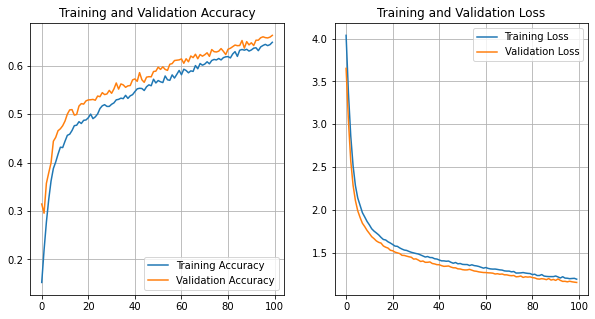

In [45]:
plot_hist(history)

## Convuolutional Neural Network

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import PIL
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

In [47]:
img_data = 'C:/Users/Steve/Documents/Santa Clara University Classes/Fall 2021/Deep Learning/Final Project/images_original'

In [48]:
BATCH_SIZE=8
TARGET_SIZE=224 # Based on EfficientNet
NUM_CLASSES=10

In [49]:
#Split train set
train_ds = image_dataset_from_directory(
  img_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 800 files for training.


In [50]:
#Split test set
val_ds = image_dataset_from_directory(
  img_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [51]:
class_names = train_ds.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


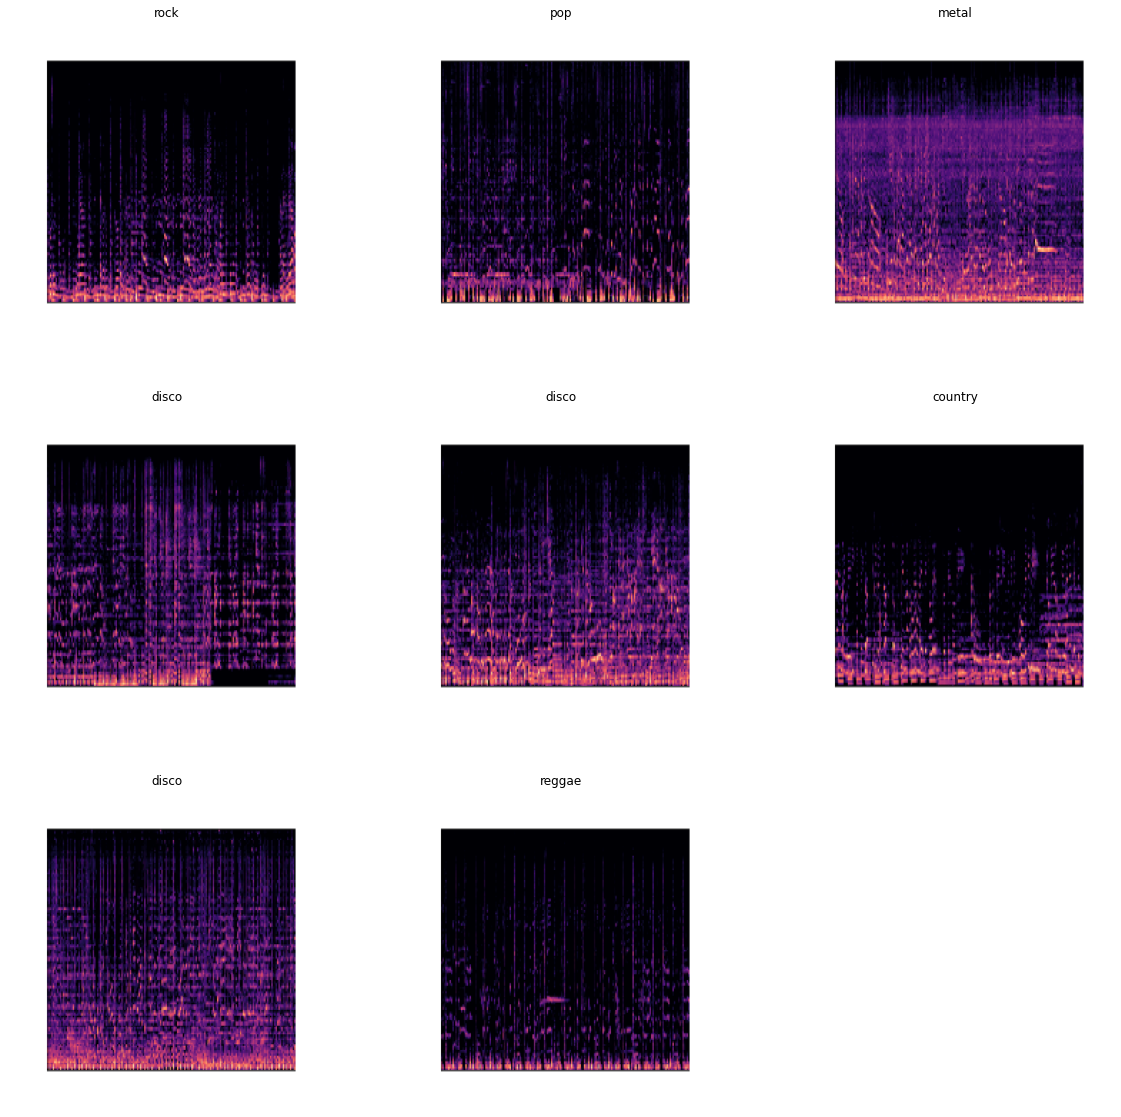

In [52]:
#Sample of spectograms images to train
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [53]:
#Use same methods as neural network
model_save = tf.keras.callbacks.ModelCheckpoint('./best_weights.h5', 
                             save_best_only = True, 
                             save_weights_only = True,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'min', verbose = 1)

In [54]:
model = Sequential([
  layers.experimental.preprocessing\
    .Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)       

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)       

In [56]:
model_save = tf.keras.callbacks.ModelCheckpoint('./best_weights.h5', 
                             save_best_only = True, 
                             save_weights_only = True,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'min', verbose = 1)

In [57]:
model.compile(optimizer=Adam(lr = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30

Epoch 00001: val_loss improved from inf to 2.05361, saving model to .\best_weights.h5
100/100 - 15s - loss: 2.2306 - accuracy: 0.1875 - val_loss: 2.0536 - val_accuracy: 0.1910 - lr: 0.0010 - 15s/epoch - 146ms/step
Epoch 2/30

Epoch 00002: val_loss improved from 2.05361 to 1.72526, saving model to .\best_weights.h5
100/100 - 13s - loss: 1.8051 - accuracy: 0.3562 - val_loss: 1.7253 - val_accuracy: 0.3769 - lr: 0.0010 - 13s/epoch - 127ms/step
Epoch 3/30

Epoch 00003: val_loss improved from 1.72526 to 1.45763, saving model to .\best_weights.h5
100/100 - 13s - loss: 1.2788 - accuracy: 0.5587 - val_loss: 1.4576 - val_accuracy: 0.4724 - lr: 0.0010 - 13s/epoch - 125ms/step
Epoch 4/30

Epoch 00004: val_loss did not improve from 1.45763
100/100 - 12s - loss: 0.8456 - accuracy: 0.7287 - val_loss: 1.4718 - val_accuracy: 0.4975 - lr: 0.0010 - 12s/epoch - 118ms/step
Epoch 5/30

Epoch 00005: val_loss improved from 1.45763 to 1.39911, saving model to .\best_weights.h5
100/100 - 12s - loss:

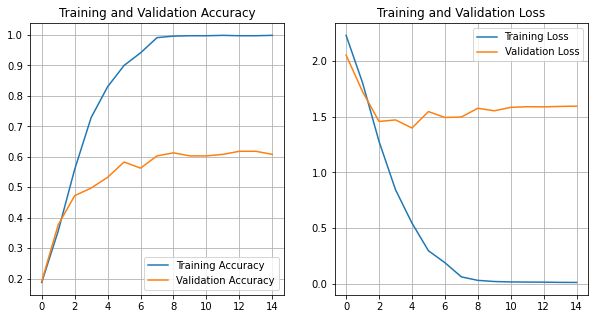

In [59]:
plot_hist(history)

In [63]:
scores = model.evaluate(val_ds)

25/25 [==============================] - 1s 22ms/step - loss: 1.3991 - accuracy: 0.5327


# EfficientNet

In [64]:
#Def for efficient net model
def efficientnet_model():
    cnn_base = EfficientNetB0(include_top = False, 
                              weights = "imagenet", drop_connect_rate=0.6,
                               input_shape = (TARGET_SIZE, TARGET_SIZE, 3))
    model = cnn_base.output
    model = layers.GlobalAveragePooling2D()(model)
    model = layers.Dense(NUM_CLASSES, activation = "softmax")(model)
    model = models.Model(cnn_base.input, model)

    model.compile(optimizer = Adam(lr = 0.001),
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])
    return model
effmodel = efficientnet_model()
effmodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [65]:
epochs = 30
history = effmodel.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30

Epoch 00001: val_loss did not improve from 1.39911
100/100 - 90s - loss: 1.6230 - accuracy: 0.4625 - val_loss: 3.1899 - val_accuracy: 0.3668 - lr: 0.0010 - 90s/epoch - 900ms/step
Epoch 2/30

Epoch 00002: val_loss improved from 1.39911 to 1.38322, saving model to .\best_weights.h5
100/100 - 84s - loss: 1.3010 - accuracy: 0.5625 - val_loss: 1.3832 - val_accuracy: 0.5578 - lr: 0.0010 - 84s/epoch - 835ms/step
Epoch 3/30

Epoch 00003: val_loss did not improve from 1.38322
100/100 - 77s - loss: 1.0620 - accuracy: 0.6350 - val_loss: 1.5528 - val_accuracy: 0.5528 - lr: 0.0010 - 77s/epoch - 769ms/step
Epoch 4/30

Epoch 00004: val_loss did not improve from 1.38322

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
100/100 - 77s - loss: 0.8343 - accuracy: 0.7225 - val_loss: 3.1637 - val_accuracy: 0.3869 - lr: 0.0010 - 77s/epoch - 766ms/step
Epoch 5/30

Epoch 00005: val_loss improved from 1.38322 to 1.11178, saving model to .\best_weights.h5
100/100 - 79s 

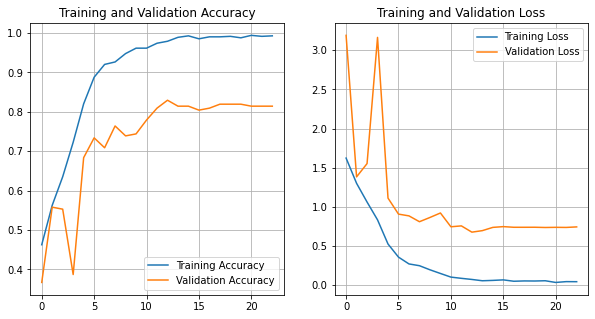

In [66]:
plot_hist(history)

Efficientnet Source
https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

In [68]:
scores = effmodel.evaluate(val_ds)

25/25 [==============================] - 4s 166ms/step - loss: 0.6774 - accuracy: 0.8291
